<h3>1.4 - Exercício

In [75]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np
from scipy import stats
import seaborn as sns
import pyarrow
dados_json = pd.read_json("aula_2_e_3/dados_brutos.json")
dados_parquet = pd.read_parquet("aula_2_e_3/dados_brutos.parquet")
dados_csv = pd.read_csv("aula_2_e_3/dados_brutos.csv")
dados = pd.concat([dados_json, dados_parquet, dados_csv])
estados = pd.read_csv('aula_2_e_3/estados.csv')
display(dados)


,uf,tipo,cod_localidade,feat_1,feat_2,feat_3,feat_4,loc_x,loc_y,mercado_mais_proximo,farmacia_mais_proxima,escola_mais_proxima,num_penit_4km,num_penit_500m,idade_imovel,area,preco
700,ES,Tipo 1,None,0.638824,10.158127,4.874347,26.151255,0.632733,0.481356,341.680530,3456.862812,2557.124996,0.0,0.0,37.0,NaN,1329074
701,SP,Tipo 2,Localidade 4,0.794100,11.467263,4.889458,25.737262,0.290362,0.649488,3121.658324,2711.257761,2635.042549,0.0,0.0,4.0,151.0,980660
702,MS,Tipo 1,Localidade 4,0.745027,11.088365,4.644014,26.165747,0.117298,0.131615,1808.463617,1178.930223,1231.387072,0.0,NaN,15.0,170.0,1044861
703,PR,Tipo 1,Localidade 1,0.773947,12.182951,5.778339,21.948647,0.521053,0.021927,4189.517081,6402.599591,1738.502238,0.0,0.0,8.0,84.0,1347838
704,RO,Tipo 2,Localidade 1,0.686853,10.321383,4.589251,27.254870,0.985792,0.744716,385.176751,1630.761705,3446.457453,0.0,0.0,20.0,168.0,751177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,SP,Tipo 1,Localidade 3,0.807686,12.357281,5.199053,24.599191,0.958975,0.438182,3625.900955,1745.397948,1626.510892,0.0,0.0,15.0,114.0,1724680
696,ES,Tipo 2,Localidade 2,0.722176,10.885625,3.591317,32.177915,0.237593,0.131817,2065.284141,6537.159085,5768.431924,0.0,0.0,13.0,187.0,991066
697,PR,Tipo 1,Localidade 1,0.722882,10.646284,4.610362,26.325999,0.023793,0.564470,3463.382052,1719.600828,3653.221303,1.0,0.0,4.0,58.0,1378355
698,RR,Tipo 2,Localidade 4,0.877611,12.795508,4.626854,27.036806,0.187589,0.875198,5043.571791,3729.541516,1526.277230,0.0,0.0,18.0,98.0,551614


<h3>3 - Exercício

<h4> Padronização das variáveis

In [76]:



df_processed = dados.copy()


le_tipo = LabelEncoder()
df_processed['tipo'] = le_tipo.fit_transform(df_processed['tipo'])


le_localidade = LabelEncoder()
df_processed['cod_localidade'] = le_localidade.fit_transform(df_processed['cod_localidade'])


<h4> Remoção dos outliers e erros sistemáticos

In [77]:

Q1 = df_processed['preco'].quantile(0.25)
Q3 = df_processed['preco'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_processed = df_processed[(df_processed['preco'] >= lower_bound) & (df_processed['preco'] <= upper_bound)]


df_processed = df_processed.dropna(subset=['cod_localidade'])
df_processed = df_processed.dropna(subset=['num_penit_500m'])


display(df_processed)


,uf,tipo,cod_localidade,feat_1,feat_2,feat_3,feat_4,loc_x,loc_y,mercado_mais_proximo,farmacia_mais_proxima,escola_mais_proxima,num_penit_4km,num_penit_500m,idade_imovel,area,preco
700,ES,10,25,0.638824,10.158127,4.874347,26.151255,0.632733,0.481356,341.680530,3456.862812,2557.124996,0.0,0.0,37.0,NaN,1329074
701,SP,11,8,0.794100,11.467263,4.889458,25.737262,0.290362,0.649488,3121.658324,2711.257761,2635.042549,0.0,0.0,4.0,151.0,980660
703,PR,10,4,0.773947,12.182951,5.778339,21.948647,0.521053,0.021927,4189.517081,6402.599591,1738.502238,0.0,0.0,8.0,84.0,1347838
704,RO,11,4,0.686853,10.321383,4.589251,27.254870,0.985792,0.744716,385.176751,1630.761705,3446.457453,0.0,0.0,20.0,168.0,751177
705,SP,10,6,0.777623,11.976277,4.721811,26.330180,0.694784,0.001640,1688.295804,3544.858189,4446.338304,0.0,0.0,4.0,163.0,858926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,RJ,10,8,0.632558,10.145691,4.038915,29.428278,0.131250,0.956201,5838.657383,4347.137048,1534.095664,0.0,0.0,17.0,169.0,1281005
696,ES,11,6,0.722176,10.885625,3.591317,32.177915,0.237593,0.131817,2065.284141,6537.159085,5768.431924,0.0,0.0,13.0,187.0,991066
697,PR,10,4,0.722882,10.646284,4.610362,26.325999,0.023793,0.564470,3463.382052,1719.600828,3653.221303,1.0,0.0,4.0,58.0,1378355
698,RR,11,8,0.877611,12.795508,4.626854,27.036806,0.187589,0.875198,5043.571791,3729.541516,1526.277230,0.0,0.0,18.0,98.0,551614


<h4> Junção DF estados

In [78]:


df_joined = df_processed.merge(estados, on='uf', how='left')


df_joined['regiao'] = df_joined['regiao'].fillna('Região Desconhecida')

print(df_joined)

      uf  tipo  cod_localidade    feat_1     feat_2    feat_3     feat_4   
0     ES    10              25  0.638824  10.158127  4.874347  26.151255  \
1     SP    11               8  0.794100  11.467263  4.889458  25.737262   
2     PR    10               4  0.773947  12.182951  5.778339  21.948647   
3     RO    11               4  0.686853  10.321383  4.589251  27.254870   
4     SP    10               6  0.777623  11.976277  4.721811  26.330180   
...   ..   ...             ...       ...        ...       ...        ...   
1981  RJ    10               8  0.632558  10.145691  4.038915  29.428278   
1982  ES    11               6  0.722176  10.885625  3.591317  32.177915   
1983  PR    10               4  0.722882  10.646284  4.610362  26.325999   
1984  RR    11               8  0.877611  12.795508  4.626854  27.036806   
1985  MS    11               8  0.731793  11.169191  4.447866  27.035952   

         loc_x     loc_y  mercado_mais_proximo  ...  escola_mais_proxima   
0     0.632

<h4> Imputação de dados

In [79]:


df_no_missing = df_processed.dropna(subset=['feat_1', 'feat_2', 'feat_3', 'feat_4'])
df_missing = df_processed[df_processed.isnull().any(axis=1)]
correlated_features = [('feat_1', 'feat_2'), ('feat_3', 'feat_4')]

for feat_x, feat_y in correlated_features:

    X_train = df_no_missing[feat_x].values.reshape(-1, 1)
    y_train = df_no_missing[feat_y].values.reshape(-1, 1)


    imputer = SimpleImputer(strategy='mean')
    

    X_train_imputed = imputer.fit_transform(X_train)
    

    model = LinearRegression()
    

    model.fit(X_train_imputed, y_train)
    

    X_missing = df_missing[feat_x].values.reshape(-1, 1)
    

    X_missing_imputed = imputer.transform(X_missing)
    

    y_missing = model.predict(X_missing_imputed)



<h4> Remova os outliers dos pares de variáveis (feat_1, feat_2) e (feat_3, feat_4) utilizando o método z-score multidimensional;

In [80]:


correlated_features = [('feat_1', 'feat_2'), ('feat_3', 'feat_4')]


for feat_x, feat_y in correlated_features:

    z_scores = np.abs(stats.zscore(df_processed[[feat_x, feat_y]]))
    

    threshold = 3
    

    outlier_rows = np.where(z_scores > threshold)[0]

    df_processed = df_processed.drop(df_processed.index[outlier_rows])




<h4>Identifique se existem outras variávies do conjunto com outliers, e, caso existam, remova os outliers citando a natureza da variável e o méteodo utilizado para identificação dos outliers;

In [81]:
variables = ['idade_imovel', 'preco']


for var in variables:

    z_scores = np.abs(stats.zscore(df_processed[var]))
    

    threshold = 3
    

    outlier_rows = np.where(z_scores > threshold)[0]
    

    df_processed = df_processed.drop(df_processed.index[outlier_rows])

<h4>Após finalizar as atividades citadas anteriormente, remova todos os dados faltantes ainda presentes no conjunto de dados;


In [83]:
df_processed = df_processed.dropna()

df_processed.to_parquet('final.parquet')



,uf,tipo,cod_localidade,feat_1,feat_2,feat_3,feat_4,loc_x,loc_y,mercado_mais_proximo,farmacia_mais_proxima,escola_mais_proxima,num_penit_4km,num_penit_500m,idade_imovel,area,preco
700,ES,10,25,0.638824,10.158127,4.874347,26.151255,0.632733,0.481356,341.680530,3456.862812,2557.124996,0.0,0.0,37.0,NaN,1329074
701,SP,11,8,0.794100,11.467263,4.889458,25.737262,0.290362,0.649488,3121.658324,2711.257761,2635.042549,0.0,0.0,4.0,151.0,980660
703,PR,10,4,0.773947,12.182951,5.778339,21.948647,0.521053,0.021927,4189.517081,6402.599591,1738.502238,0.0,0.0,8.0,84.0,1347838
704,RO,11,4,0.686853,10.321383,4.589251,27.254870,0.985792,0.744716,385.176751,1630.761705,3446.457453,0.0,0.0,20.0,168.0,751177
705,SP,10,6,0.777623,11.976277,4.721811,26.330180,0.694784,0.001640,1688.295804,3544.858189,4446.338304,0.0,0.0,4.0,163.0,858926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,RJ,10,8,0.632558,10.145691,4.038915,29.428278,0.131250,0.956201,5838.657383,4347.137048,1534.095664,0.0,0.0,17.0,169.0,1281005
696,ES,11,6,0.722176,10.885625,3.591317,32.177915,0.237593,0.131817,2065.284141,6537.159085,5768.431924,0.0,0.0,13.0,187.0,991066
697,PR,10,4,0.722882,10.646284,4.610362,26.325999,0.023793,0.564470,3463.382052,1719.600828,3653.221303,1.0,0.0,4.0,58.0,1378355
698,RR,11,8,0.877611,12.795508,4.626854,27.036806,0.187589,0.875198,5043.571791,3729.541516,1526.277230,0.0,0.0,18.0,98.0,551614


<h4>Realize uma análise exploratória completa do conjunto de dados tratado;


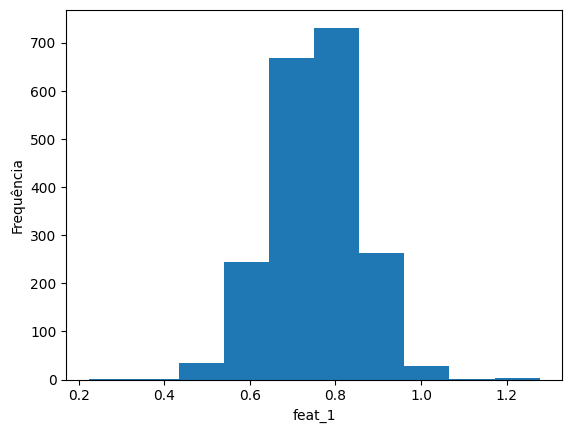

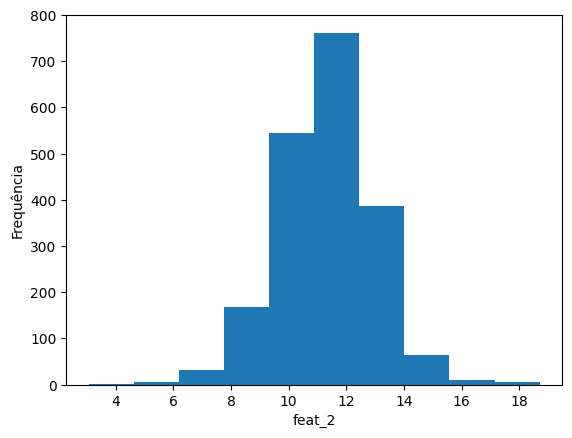

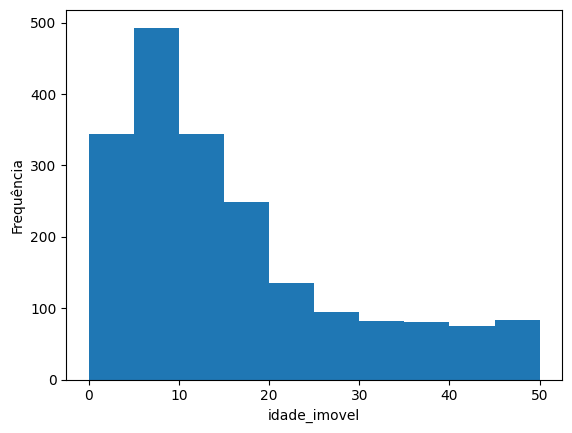

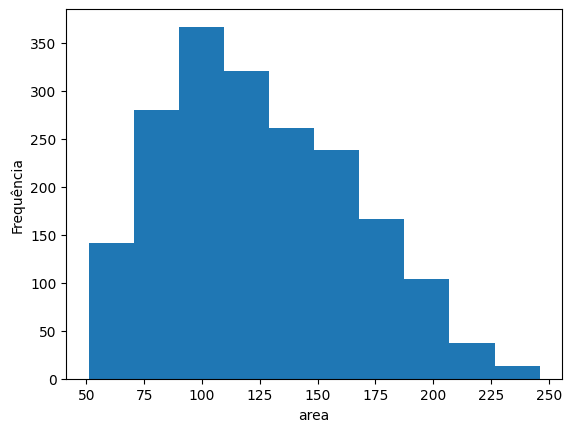

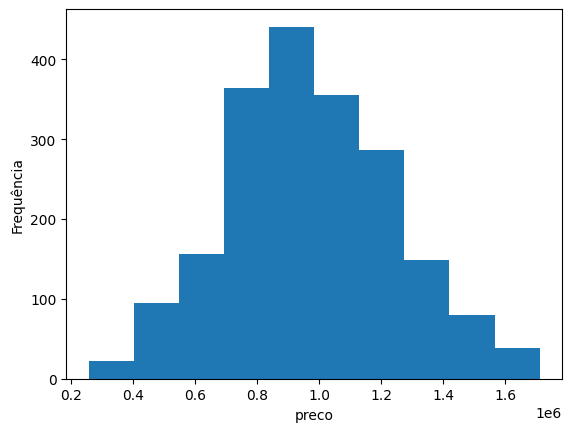

                feat_1    feat_2  idade_imovel      area     preco
feat_1        1.000000  0.940950      0.013715 -0.021579  0.040137
feat_2        0.940950  1.000000      0.023996 -0.033594  0.051148
idade_imovel  0.013715  0.023996      1.000000  0.002104  0.278832
area         -0.021579 -0.033594      0.002104  1.000000 -0.058396
preco         0.040137  0.051148      0.278832 -0.058396  1.000000


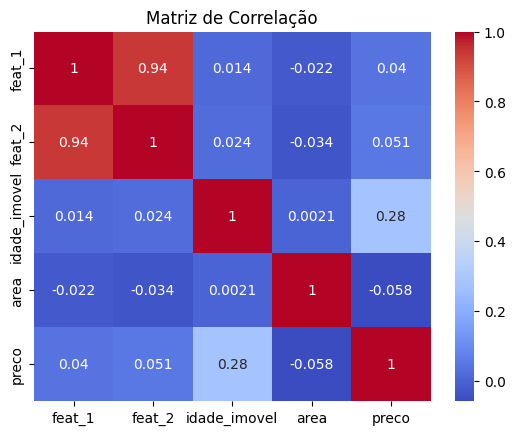

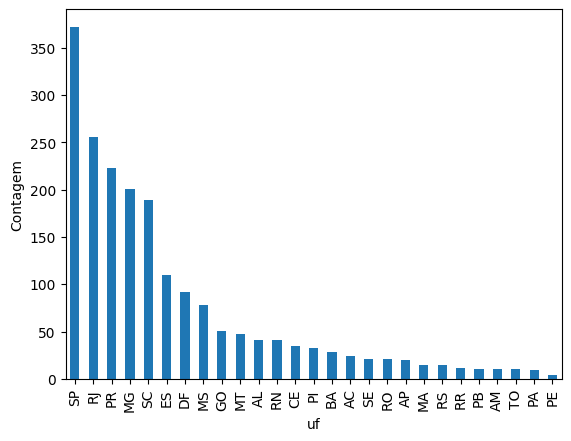

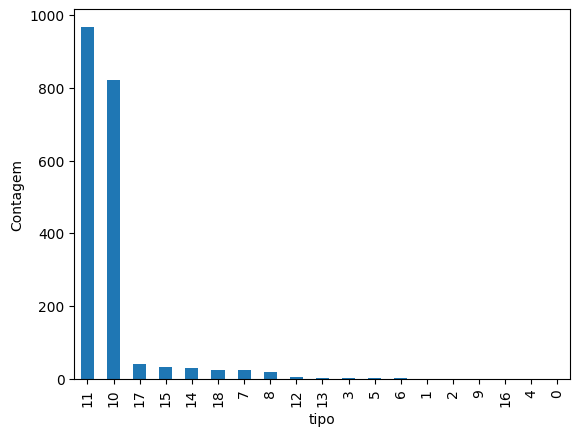

In [84]:
df_processed.describe()


# Distribuição das variáveis numéricas:
numeric_variables = ['feat_1', 'feat_2', 'idade_imovel', 'area', 'preco']

for var in numeric_variables:
    plt.hist(df_processed[var], bins=10)
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.show()

# Matriz de correlação entre as variáveis numéricas:
correlation_matrix = df_processed[numeric_variables].corr()
print(correlation_matrix)

# Mapa de calor para visualizar a matriz de correlação:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Gráficos de barras para visualizar a distribuição das variáveis categóricas:

categorical_variables = ['uf', 'tipo']

for var in categorical_variables:
    df_processed[var].value_counts().plot(kind='bar')
    plt.xlabel(var)
    plt.ylabel('Contagem')
    plt.show()

